In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [ ]:

def zero_pad(X, pad):

    
 
    X_pad = np.pad(X, ((0,0), (pad,pad), (pad,pad),  (0,0)), mode='constant', constant_values = (0,0))
    
    return X_pad

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


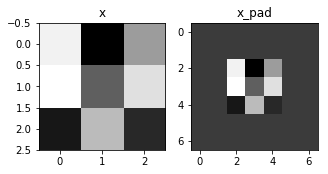

In [ ]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1,1])
print ("x_pad[1,1] =\n", x_pad[1,1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

In [ ]:

def conv_single_step(a_slice_prev, W, b):
   

    s = a_slice_prev * W
    Z = np.sum(s)
    Z = float(Z + b)
   

    return Z

In [ ]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = -6.999089450680221


In [ ]:

def conv_forward(A_prev, W, b, hparameters):
   
    (m, n_H_prev, n_W_prev, n_C_prev) = np.shape(A_prev)
    

    (f, f, n_C_prev, n_C) = np.shape(W)
    
   
    stride = hparameters['stride']
    pad = hparameters['pad']

    n_H = int(((n_H_prev-f+2*pad)/stride))+1
    n_W = int(((n_W_prev-f+2*pad)/stride))+1
    
    Z = np.zeros((m,n_H,n_W,n_C))
    
    A_prev_pad = zero_pad(A_prev, pad)
    
    for i in range(m):               
        a_prev_pad = A_prev_pad[i,:,:,:]              
        for h in range(n_H):           
            vert_start = h*stride
            vert_end = h*stride+f
            
            for w in range(n_W):      
                horiz_start = w*stride
                horiz_end = w*stride+f
                
                for c in range(n_C):  
                    a_slice_prev = a_prev_pad[vert_start:vert_end,horiz_start:horiz_end,:]
                    
                    weights = W[:,:,:,c]
                    biases = b[:,:,:,c]
                    Z[i, h, w, c] = conv_single_step(a_slice_prev,weights, biases)
                                        

    assert(Z.shape == (m, n_H, n_W, n_C))
    
   
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [ ]:
np.random.seed(1)
A_prev = np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[3,2,1] =\n", Z[3,2,1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])

Z's mean =
 0.692360880758
Z[3,2,1] =
 [ -1.28912231   2.27650251   6.61941931   0.95527176   8.25132576
   2.31329639  13.00689405   2.34576051]
cache_conv[0][1][2][3] =
 [-1.1191154   1.9560789  -0.3264995  -1.34267579]


In [ ]:


def pool_forward(A_prev, hparameters, mode = "max"):
   
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    A = np.zeros((m, n_H, n_W, n_C))              
    
    for i in range(m):                         
        for h in range(n_H):                     
            vert_start = h*stride
            vert_end = h*stride +1
            
            for w in range(n_W):                
                horiz_start = w*stride
                horiz_end = w*stride +1
                
                for c in range (n_C):          
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end,c]
                    
                   
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
    
  
    cache = (A_prev, hparameters)
    
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [ ]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[ 1.62434536 -0.61175641 -0.52817175]
   [-1.07296862  0.86540763 -2.3015387 ]
   [ 1.74481176 -0.7612069   0.3190391 ]]

  [[-1.09989127 -0.17242821 -0.87785842]
   [ 0.04221375  0.58281521 -1.10061918]
   [ 1.14472371  0.90159072  0.50249434]]

  [[-0.69166075 -0.39675353 -0.6871727 ]
   [-0.84520564 -0.67124613 -0.0126646 ]
   [-1.11731035  0.2344157   1.65980218]]]


 [[[-2.02220122 -0.30620401  0.82797464]
   [ 0.23009474  0.76201118 -0.22232814]
   [-0.20075807  0.18656139  0.41005165]]

  [[ 1.19891788  0.18515642 -0.37528495]
   [-0.63873041  0.42349435  0.07734007]
   [-0.34385368  0.04359686 -0.62000084]]

  [[ 0.16938243  0.74055645 -0.9537006 ]
   [-0.26621851  0.03261455 -1.37311732]
   [ 0.31515939  0.84616065 -0.85951594]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[ 1.62434536 -0.61175641 -0.52817175]
   [-1.07296862  0.86540763 -2.3015387 ]
   [ 1.74481176 -0.7612069   0.3190391 ]]

  [[-1.09989127 -0.17242821 -0.87785842

In [ ]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 2, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()

A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

In [ ]:
def conv_backward(dZ, cache):
   
    (A_prev, W, b, hparameters) = None
    
   
    (m, n_H_prev, n_W_prev, n_C_prev) = None
    
    (f, f, n_C_prev, n_C) = None
    
    stride = None
    pad = None
    
    (m, n_H, n_W, n_C) = None
    
    dA_prev = None                           
    dW = None
    db = None

    A_prev_pad = None
    dA_prev_pad = None
    
    for i in range(None):                      
        a_prev_pad = None
        da_prev_pad = None
        
        for h in range(None):                   
            for w in range(None):               
                for c in range(None):        
                    
                    vert_start = None
                    vert_end = None
                    horiz_start = None
                    horiz_end = None
                  
                    a_slice = None

                   
                    da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += None
                    dW[:,:,:,c] += None
                    db[:,:,:,c] += None
                    
        
        dA_prev[i, :, :, :] = None
    
    assert(dA_prev.shape == (m, n_H_prev, n_W_prev, n_C_prev))
    
    return dA_prev, dW, db

In [ ]:

np.random.seed(1)
A_prev = np.random.randn(10,4,4,3)
W = np.random.randn(2,2,3,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 2,
               "stride": 2}
Z, cache_conv = conv_forward(A_prev, W, b, hparameters)

dA, dW, db = conv_backward(Z, cache_conv)
print("dA_mean =", np.mean(dA))
print("dW_mean =", np.mean(dW))
print("db_mean =", np.mean(db))

In [ ]:
def create_mask_from_window(x):

    
    
    mask = None
 
    
    return mask

In [ ]:
np.random.seed(1)
x = np.random.randn(2,3)
mask = create_mask_from_window(x)
print('x = ', x)
print("mask = ", mask)

In [ ]:
def distribute_value(dz, shape):

    (n_H, n_W) = None
    
    
    average = None
    
   
    a = None
  
    
    return a

In [ ]:
a = distribute_value(2, (2,2))
print('distributed value =', a)

In [ ]:
def pool_backward(dA, cache, mode = "max"):

    (A_prev, hparameters) = None
    
    
    stride = None
    f = None
    
    
    m, n_H_prev, n_W_prev, n_C_prev = None
    m, n_H, n_W, n_C = None
    
    dA_prev = None
    
    for i in range(None):                      
        a_prev = None
        
        for h in range(None):                   
            for w in range(None):               
                for c in range(None):           
                    
                    vert_start = None
                    vert_end = None
                    horiz_start = None
                    horiz_end = None
                    
                    if mode == "max":
                        
                        
                        a_prev_slice = None
                        
                        mask = None
                        
                        dA_prev[i, vert_start: vert_end, horiz_start: horiz_end, c] += None
                        
                    elif mode == "average":
                        
                        
                        da = None
                       
                        shape = None
                       
                        dA_prev[i, vert_start: vert_end, horiz_start: horiz_end, c] += None
                        

    assert(dA_prev.shape == A_prev.shape)
    
    return dA_prev

In [ ]:
np.random.seed(1)
A_prev = np.random.randn(5, 5, 3, 2)
hparameters = {"stride" : 1, "f": 2}
A, cache = pool_forward(A_prev, hparameters)
dA = np.random.randn(5, 4, 2, 2)

dA_prev = pool_backward(dA, cache, mode = "max")
print("mode = max")
print('mean of dA = ', np.mean(dA))
print('dA_prev[1,1] = ', dA_prev[1,1])  
print()
dA_prev = pool_backward(dA, cache, mode = "average")
print("mode = average")
print('mean of dA = ', np.mean(dA))
print('dA_prev[1,1] = ', dA_prev[1,1]) 